In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

opt=pd.read_csv(r'options.csv')
opt.head(5)

opt.columns


Index(['id', 'project_id', 'name', 'active', 'inactive_at',
       'operating_schedule_id', 'rate_schedule_id', 'created_by_user_id',
       'created_at', 'updated_at', 'installation_labor_rate', 'markup',
       'labor_cost', 'shipping_cost', 'misc_cost', 'all_solutions',
       'financing_debt_percentage', 'financing_interest_rate',
       'financing_loan_months', 'incentive_179d', 'rebates',
       'disable_solution_rebates', 'finance_discount_rate', 'finance_term',
       'recycling_cost', 'assigned_rebates', 'disable_savings_cooling',
       'disable_savings_heating', 'disable_savings_maintenance'],
      dtype='object')

In [2]:
pro=pd.read_csv(r'projects.csv',encoding="ISO-8859-1")
pro.columns

Index(['id', 'company_id', 'name', 'created_by_user_id', 'created_at',
       'updated_at', 'company_project_status_id', 'client_id', 'contact_id',
       'active', 'inactive_at', 'utility_id', 'utility_rate_plan',
       'facility_type_id', 'rate_schedule_id', 'operating_schedule_id',
       'cooling_id', 'heating_id', 'internal_notes', 'notes',
       'prepared_for_user_id', 'prepared_by_user_id', 'maintenance_labor_rate',
       'markup', 'apply_tax_on', 'tax_type', 'tax_rate_source', 'tax_rate',
       'encentiv_id', 'financing_debt_percentage', 'financing_interest_rate',
       'financing_loan_months', 'incentive_max_type', 'incentive_max',
       'all_company_access', 'client_logo', 'markup_type', 'test',
       'probability', 'expected_close_date', 'shipping_address_location',
       'rebate_bus_id', 'highest_value_option_id', 'audit_status', 'uuid',
       'funding_status', 'enable_sync', 'finance_discount_rate',
       'finance_term', 'copied_from_id', 'copy_status', 'tax_exem

In [3]:
pro.rename(columns = {'id':'project_id'}, inplace = True)
opt_pro=pd.merge(opt, pro, on = 'project_id',how='inner')

In [4]:
opt_pro.shape

(9942, 82)

In [5]:
opt_pro.columns


Index(['id', 'project_id', 'name_x', 'active_x', 'inactive_at_x',
       'operating_schedule_id_x', 'rate_schedule_id_x', 'created_by_user_id_x',
       'created_at_x', 'updated_at_x', 'installation_labor_rate', 'markup_x',
       'labor_cost', 'shipping_cost', 'misc_cost', 'all_solutions',
       'financing_debt_percentage_x', 'financing_interest_rate_x',
       'financing_loan_months_x', 'incentive_179d', 'rebates',
       'disable_solution_rebates', 'finance_discount_rate_x', 'finance_term_x',
       'recycling_cost', 'assigned_rebates', 'disable_savings_cooling',
       'disable_savings_heating', 'disable_savings_maintenance', 'company_id',
       'name_y', 'created_by_user_id_y', 'created_at_y', 'updated_at_y',
       'company_project_status_id', 'client_id', 'contact_id', 'active_y',
       'inactive_at_y', 'utility_id', 'utility_rate_plan', 'facility_type_id',
       'rate_schedule_id_y', 'operating_schedule_id_y', 'cooling_id',
       'heating_id', 'internal_notes', 'notes', 'p

In [6]:
opt_pro=opt_pro[['id', 'project_id','company_id','encentiv_id','rebates','assigned_rebates','disable_solution_rebates']]

In [7]:
#projects.company_id=companies.id
com=pd.read_csv(r'companies.csv',encoding="ISO-8859-1")
com.columns


Index(['id', 'name', 'primary_contact_user_id', 'billing_contact_name',
       'created_at', 'updated_at', 'created_by_user_id', 'active',
       'inactive_at', 'status', 'industry_type_id', 'description',
       'office_phone', 'billing_same_as_company', 'default_proposal_theme_id',
       'default_proposal_footer', 'default_estimates_footer', 'default_intro',
       'default_team', 'default_legal', 'default_disclaimers',
       'default_references', 'default_estimates', 'logo', 'markup_type',
       'markup', 'test', 'vendor', 'partner', 'buyer', 'stripe_customer_id',
       'sales_users_count', 'billing_contact_email', 'stripe_status',
       'stripe_id', 'referral_notes', 'sales_rep_user_id',
       'support_manager_user_id', 'referral_user_id', 'referral_company_id',
       'financier', 'default_tag_line', 'default_credit_worthiness',
       'default_num_payments_per_year',
       'default_vendor_interest_rate_percentage',
       'default_financier_markup_modifier_percentage',
   

In [8]:
com.shape

(699, 76)

In [9]:
#companies. id-->companies. company_id (Renaming)
#projects.company_id=companies.id --> projects.company_id=companies.company_id
#opt=options +projects
#savings_df= option_calculations + option_calc_lightings 
# opt_pro_com= options + projects + companies

com.rename(columns = {'id':'company_id'}, inplace = True)
opt_pro_com=pd.merge(opt_pro, com, on = 'company_id',how='inner')

In [10]:
opt_pro_com.shape

(9942, 82)

In [11]:
opt_pro_com=opt_pro_com[['id', 'project_id', 'company_id', 'rebates'
                         , 'name','industry_type_id']]

In [12]:
df=pd.read_csv(r'option_calculations.csv')
df.head()

,id,option_id,started_at,finished_at,total_fixture_cost,total_replacement_cost,total_incentives,net_replacement_cost,total_fixture_cost_no_markup,created_at,...,proposed_kw,kw_proposed_annual_savings,payback,original_demand_cost_per_year,replacement_demand_cost_per_year,demand_savings_per_year,internal_return,loan_payment_without_tax,total_replacement_cost_post_financing,net_replacement_cost_post_financing
0,7654,7658,2020-06-05 23:47:37.601027,2020-06-05 23:47:38.537405,1917.918400,1917.918400,720.0000,1197.918400,1324.00,2020-05-27 21:14:08.583637,...,1.2600,0.8620,4.87,0.0,0.0,0.0,17.0,NaN,1917.918400,1197.918400
1,7718,7722,2020-07-20 17:15:08.167494,2020-07-20 17:15:57.137247,302649.734400,439593.454400,78273.0000,361320.454400,152636.30,2020-06-03 17:52:50.795422,...,82.7760,148.3800,4.58,0.0,0.0,0.0,19.0,NaN,439593.454400,361320.454400
2,6346,6381,2020-12-12 13:12:55.867666,2020-12-12 13:13:06.020752,50353.846154,77235.307692,16049.3000,61186.007692,32730.00,2020-01-16 23:53:08.708939,...,47.4915,79.7155,2.06,0.0,0.0,0.0,47.0,2145.425214,77235.307692,61186.007692
3,7743,7747,2020-09-22 19:19:44.251182,2020-09-22 19:19:58.022196,39367.480000,58214.480000,64160.5152,-5946.035200,32997.18,2020-06-07 07:07:36.466777,...,23.1820,62.5290,0.26,0.0,0.0,0.0,0.0,NaN,58214.480000,-5946.035200
4,7711,7715,2020-06-03 09:42:27.107033,2020-06-03 09:42:36.45513,0.000000,0.000000,0.0000,0.000000,0.00,2020-06-03 09:38:48.192876,...,30.8030,0.0000,NaN,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000


In [101]:
df_1=df[df['net_replacement_cost']==0]

In [102]:
df_1.shape

(1258, 8)

In [114]:
df_2=df[(df['total_savings_per_year']<=0) | (df['net_replacement_cost']<=0) ]

In [115]:
df_2.shape

(2300, 8)

In [94]:
df.shape

(9938, 8)

In [13]:
df.columns

Index(['id', 'option_id', 'started_at', 'finished_at', 'total_fixture_cost',
       'total_replacement_cost', 'total_incentives', 'net_replacement_cost',
       'total_fixture_cost_no_markup', 'created_at', 'updated_at',
       'existing_kwh', 'proposed_kwh', 'kwh_proposed_annual_savings',
       'original_cost_per_year', 'replacement_cost_per_year',
       'total_savings_per_year', 'total_encentiv_savings',
       'total_incentive_179d', 'total_labor_cost', 'total_shipping_cost',
       'total_misc_cost', 'total_tax_cost', 'total_cogs',
       'total_savings_per_lamp_life', 'loan_payment', 'loan_duration',
       'loan_principal', 'started_at_all', 'started_at_option',
       'original_energy_cost_per_year', 'original_maintenance_cost_per_year',
       'original_heating_cost_per_year', 'original_cooling_cost_per_year',
       'replacement_energy_cost_per_year',
       'replacement_maintenance_cost_per_year',
       'replacement_heating_cost_per_year',
       'replacement_cooling_cost_

In [14]:
df.rename(columns = {'id':'option_calculation_id'}, inplace = True)
df.columns

Index(['option_calculation_id', 'option_id', 'started_at', 'finished_at',
       'total_fixture_cost', 'total_replacement_cost', 'total_incentives',
       'net_replacement_cost', 'total_fixture_cost_no_markup', 'created_at',
       'updated_at', 'existing_kwh', 'proposed_kwh',
       'kwh_proposed_annual_savings', 'original_cost_per_year',
       'replacement_cost_per_year', 'total_savings_per_year',
       'total_encentiv_savings', 'total_incentive_179d', 'total_labor_cost',
       'total_shipping_cost', 'total_misc_cost', 'total_tax_cost',
       'total_cogs', 'total_savings_per_lamp_life', 'loan_payment',
       'loan_duration', 'loan_principal', 'started_at_all',
       'started_at_option', 'original_energy_cost_per_year',
       'original_maintenance_cost_per_year', 'original_heating_cost_per_year',
       'original_cooling_cost_per_year', 'replacement_energy_cost_per_year',
       'replacement_maintenance_cost_per_year',
       'replacement_heating_cost_per_year',
       'replac

In [15]:
df=df[['option_calculation_id', 'option_id', 'started_at', 'finished_at','total_savings_per_year','net_replacement_cost','payback','energy_savings_per_year']]

In [16]:
df.shape

(9938, 8)

In [17]:
opt_pro_com.shape

(9942, 6)

In [18]:
opt_pro_com.columns

Index(['id', 'project_id', 'company_id', 'rebates', 'name',
       'industry_type_id'],
      dtype='object')

In [19]:
# opt_pro_com.id --> opt_pro_com.option_id

opt_pro_com.rename(columns = {'id':'option_id'}, inplace = True)


In [20]:
# opt_pro_com.id --> opt_pro_com.option_id

opt_pro_com.rename(columns = {'id':'option_id'}, inplace = True)


In [21]:
opt_pro_com.columns

Index(['option_id', 'project_id', 'company_id', 'rebates', 'name',
       'industry_type_id'],
      dtype='object')

In [22]:
 exp_sav=pd.merge (df, opt_pro_com, on = 'option_id',how='inner')


In [23]:
exp_sav.shape

(9938, 13)

In [24]:
exp_sav.columns

Index(['option_calculation_id', 'option_id', 'started_at', 'finished_at',
       'total_savings_per_year', 'net_replacement_cost', 'payback',
       'energy_savings_per_year', 'project_id', 'company_id', 'rebates',
       'name', 'industry_type_id'],
      dtype='object')

In [25]:
exp_sav.company_id.nunique()

352

In [26]:
features=pd.read_csv(r'features_merge_final.csv')
features.shape

(12729, 38)

In [27]:
features.columns

Index(['project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type', 'tax_rate_source',
       'finance_discount_rate', 'tax_exempt', 'active', 'area_count',
       'area_count_sum', 'ave_annual_hours', 'monday_ave_daily_hours',
       'tuesday_ave_daily_hours', 'wednesday_ave_daily_hours',
       'thursday_ave_daily_hours', 'friday_ave_daily_hours',
       'saturday_ave_daily_hours', 'sunday_ave_daily_hours',
       'ave_weeks_per_year', 'hour_type', 'max_kwh_cost',
       'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count'],
      dtype='object')

<AxesSubplot:>

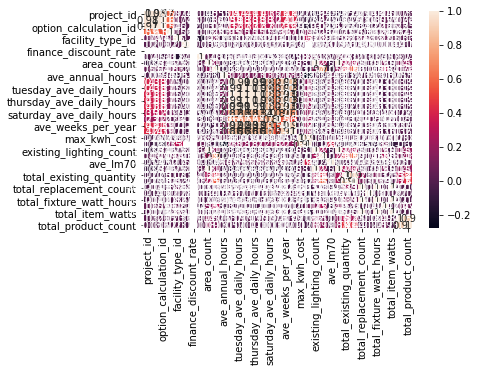

In [81]:
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(features.corr(), annot=True)

In [80]:
features.corr()

,project_id,option_id,option_calculation_id,company_id,facility_type_id,tax_rate_source,finance_discount_rate,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count
project_id,1.000000,0.980652,0.974740,0.593972,0.074189,0.020123,NaN,0.004470,-0.085111,0.055336,-0.004965,0.403338,0.404395,0.405558,0.405469,0.407368,0.345253,0.232497,0.433263,0.424813,-0.025863,-0.018763,-0.085111,0.045358,-0.053348,-0.085111,-0.026537,-0.029049,-0.000433,-0.014440,-0.000407,0.060433,-0.000731,0.029609,0.017858
option_id,0.980652,1.000000,0.995010,0.610067,0.074192,0.016114,NaN,0.012823,-0.084332,0.063997,-0.005415,0.379140,0.380123,0.381115,0.381031,0.382324,0.322146,0.218335,0.407161,0.403699,-0.026664,-0.081738,-0.084332,0.049185,-0.048844,-0.084332,-0.025162,-0.027933,-0.000301,-0.016427,-0.000267,0.058778,-0.000638,0.026427,0.015674
option_calculation_id,0.974740,0.995010,1.000000,0.535618,0.060508,0.021990,NaN,-0.030040,0.015603,0.047290,0.015235,0.366335,0.367834,0.368777,0.368806,0.369524,0.312014,0.204771,0.391951,0.388129,-0.038601,-0.132241,0.015603,0.048702,-0.052365,0.015603,-0.031351,-0.034474,-0.032011,-0.021721,-0.012008,0.066320,-0.022852,0.024721,0.012084
company_id,0.593972,0.610067,0.535618,1.000000,0.056297,0.021246,NaN,0.018276,-0.025213,0.082617,0.009507,0.148388,0.147583,0.148515,0.149166,0.150943,0.098569,0.035579,0.169221,0.168743,-0.009064,0.154198,-0.025213,0.063765,-0.017060,-0.025213,0.016881,0.005272,0.008618,-0.011573,0.008641,0.061647,0.008373,0.022711,0.019812
facility_type_id,0.074189,0.074192,0.060508,0.056297,1.000000,0.025646,NaN,-0.135547,0.008735,0.119825,-0.063444,0.010810,0.008730,0.009297,0.009209,0.009056,0.012685,0.041280,0.011303,0.010535,0.006294,0.317642,0.008735,0.093157,-0.005621,0.008735,0.032956,0.024410,0.067707,0.018375,0.027474,0.081114,0.051292,0.035773,0.036660
tax_rate_source,0.020123,0.016114,0.021990,0.021246,0.025646,1.000000,NaN,-0.003932,0.006648,0.001044,0.018128,0.003007,0.003011,0.003019,0.003014,0.003018,0.002503,0.001799,0.003234,0.003261,0.000265,NaN,0.006648,0.000733,0.019166,0.006648,0.001391,0.000979,0.000103,0.000110,0.000104,0.000435,0.000105,0.001886,0.002146
finance_discount_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active,0.004470,0.012823,-0.030040,0.018276,-0.135547,-0.003932,NaN,1.000000,0.047546,0.016425,-0.056060,-0.004393,-0.004381,-0.003820,-0.004358,-0.005826,-0.044171,-0.029667,-0.025287,-0.037882,0.008466,0.080043,0.047546,0.002156,-0.003410,0.047546,0.029881,0.021467,0.003130,0.003359,0.003137,-0.052595,0.003209,0.013889,0.017792
area_count,-0.085111,-0.084332,0.015603,-0.025213,0.008735,0.006648,NaN,0.047546,1.000000,0.171781,-0.033023,-0.065771,-0.065697,-0.066025,-0.066245,-0.067307,-0.062397,-0.043369,-0.076130,-0.067516,0.030684,-0.011956,1.000000,0.248881,-0.028620,1.000000,0.260769,0.249535,-0.003879,-0.001904,-0.003870,0.151560,-0.003988,0.154617,0.193023
area_count_sum,0.055336,0.063997,0.047290,0.082617,0.119825,0.001044,NaN,0.016425,0.171781,1.000000,-0.068220,-0.021163,-0.021209,-0.021300,-0.021244,-0.021304,-0.021854,-0.015528,-0.021569,-0.012627,-0.001528,-0.056606,0.171781,0.721599,-0.056372,0.171781,0.415030,0.557529,-0.000623,0.000555,-0.000637,0.296970,-0.000640,0.075638,0.132479


In [28]:
features.company_id.nunique()

325

In [29]:
Final=features.merge(exp_sav,on=['option_id','option_calculation_id','project_id','company_id'],how='inner')

In [30]:
Final.shape

(6199, 47)

In [31]:
Final.company_id.nunique()

279

In [32]:
Final.columns

Index(['project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type', 'tax_rate_source',
       'finance_discount_rate', 'tax_exempt', 'active', 'area_count',
       'area_count_sum', 'ave_annual_hours', 'monday_ave_daily_hours',
       'tuesday_ave_daily_hours', 'wednesday_ave_daily_hours',
       'thursday_ave_daily_hours', 'friday_ave_daily_hours',
       'saturday_ave_daily_hours', 'sunday_ave_daily_hours',
       'ave_weeks_per_year', 'hour_type', 'max_kwh_cost',
       'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'started_at', 'finished_at', 'total_savings_per_year',
       'net_rep

In [33]:
Final.shape

(6199, 47)

In [34]:
Final= Final[[
        
        #ids
       'project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type','industry_type_id','name',
        
        #dates
        'started_at', 'finished_at',
        
        #features
       'tax_rate_source','finance_discount_rate', 'tax_exempt', 'active', 'area_count',
       'area_count_sum', 'ave_annual_hours', 'monday_ave_daily_hours',
       'tuesday_ave_daily_hours', 'wednesday_ave_daily_hours',
       'thursday_ave_daily_hours', 'friday_ave_daily_hours',
       'saturday_ave_daily_hours', 'sunday_ave_daily_hours',
       'ave_weeks_per_year', 'hour_type', 'max_kwh_cost',
       'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count','energy_savings_per_year',
       
        #savings
       'total_savings_per_year', 'rebates','payback',
    
        #expenditures
       'net_replacement_cost']]

In [49]:
print("Null values ")
print()

for i in Final.columns:
    if (Final[i].isnull().sum()/len(Final))*100 >= 30:
        print(i,":", Final[i].isnull().sum()/len(Final)*100,"%")

print("\n Columns which have mostly zero's ")
print()

        
for i in Final.columns:
    if len(Final[Final[i]==0])/len(Final)*100 >=30:
        print(i,":", len(Final[Final[i]==0])/len(Final)*100,"%")

Null values 

facility_type_id : 53.41184061945475 %
facility_type : 53.41184061945475 %
industry_type_id : 53.363445717051135 %
max_kwh_cost_simple : 98.09646717212453 %
rebates : 79.19019196644619 %

 Columns which have mostly zero's 

tax_exempt : 99.5321826100984 %
monday_ave_daily_hours : 79.15792869817713 %
tuesday_ave_daily_hours : 79.15792869817713 %
wednesday_ave_daily_hours : 79.10953379577352 %
thursday_ave_daily_hours : 79.07727052750444 %
friday_ave_daily_hours : 79.15792869817713 %
saturday_ave_daily_hours : 82.33586062268108 %
sunday_ave_daily_hours : 86.85271818035167 %
ave_weeks_per_year : 78.99661235683175 %


In [36]:
Final.project_id.nunique()

4458

In [37]:
Final.company_id.nunique()

279

In [38]:
ROI=(Final['total_savings_per_year']/Final['net_replacement_cost'])*100

In [39]:
Final.insert(45, "ROI", ROI , True)

In [40]:
Final.shape

(6199, 48)

In [41]:
Final.head()

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,...,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,ROI,payback,net_replacement_cost
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,...,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,0.000000,NaN,2.1300
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,...,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,297.198880,0.34,119.0000
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,...,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,13330.0000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,...,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,inf,NaN,0.0000
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,...,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,12.304965,NaN,8489.2094


In [42]:
count=0
for i in ROI:
    if i>20:
        count+=1
print(count)    


4174


In [72]:
Final_test=Final[Final['net_replacement_cost']!= 0]

In [61]:
Final.project_id.nunique()

4458

In [60]:
Final_test.project_id.nunique()

4381

In [75]:
Final_test.shape

(5950, 48)

In [69]:
pd.set_option('display.max_columns', None)
Final_test[Final_test.notnull()]

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.00000,0.000000,18.0,2.130000,NaN,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,NaN,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,87.00000,353.666667,NaN,119.000000,0.34,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.00000,0.000000,NaN,13330.000000,NaN,0.000000
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,NaN,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,966.59424,1044.594240,NaN,8489.209400,NaN,12.304965
5,16,7.0,1262.0,7,Acme Grocery Store,2.0,Bakery,NaN,Bartoletti and Sons,2020-03-22 01:28:08.640687,2020-03-22 01:28:10.536768,NaN,5,False,True,1,8.0,2060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,NaN,1,760.0,1000.000000,1,10.0,10.0,10.0,10.0,100000.0,25.000000,100.0,1,1,176.00000,326.000000,NaN,615.200000,1.89,52.990897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,12129,10283.0,10279.0,581,CTI -Fayette County,NaN,NaN,2239.0,"Harvey, Kozey and Schuster",2021-04-28 21:40:13.15336,2021-04-28 21:40:26.074252,2.0,5,False,True,5,200.0,1896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,NaN,5,69200.0,20000.000000,5,1292.0,1332.0,1389.0,738.0,90604152.0,690.928270,47787.0,27,31,10638.98688,11334.084180,NaN,204793.166600,NaN,5.534405
6194,12131,10277.0,10273.0,1050,Boise Office Building,NaN,NaN,NaN,Wolf-Hickle,2021-04-28 21:40:22.971261,2021-04-28 21:40:27.468194,2.0,5,False,True,3,96.0,4380.0,9.5,9.5,9.5,9.5,9.5,0.0,0.0,52.0,2.0,NaN,0.085,3,100368.0,17500.000000,3,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7362.24610,8698.786600,NaN,7919.321000,0.91,109.842581
6195,12132,10278.0,10274.0,155,L.E.D. Test Project,40.0,Office (General Office Types),NaN,"Ritchie, Kautzer and Berge",2021-04-28 21:40:22.986063,2021-04-28 21:40:26.065806,2.0,5,False,True,1,16.0,8760.0,5.0,5.0,5.0,5.0,6.0,6.0,0.0,26.0,2.0,0.10,NaN,1,680.0,20000.000000,1,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,185.70240,177.842066,250.0,935.701564,4.88,19.006281
6197,12138,10286.0,10282.0,118,Leavitt Machinery,25.0,Industrial - 1 Shift,NaN,"Batz, Keebler and Schiller",2021-04-28 21:40:27.581916,2021-04-28 21:40:29.29231,2.0,5,False,True,1,1.0,NaN,9.0,9.

In [78]:
Final_test1=Final_test[Final_test['active']==True]

In [116]:
Final_test1.shape

(5466, 48)

In [149]:
Final_2=Final[Final['total_savings_per_year']>=0]

In [150]:
Final_2=Final_2[Final_2['net_replacement_cost']>=0]

In [153]:
Final_2.shape

(5425, 48)

In [152]:
Final_2=Final_2[Final_2['active']==True]

In [155]:
count=0
for i in Final_2['ROI']:
    if i>20:
        count+=1
print(count)    

3820


In [154]:
Final_2['ROI'].describe()

count    5341.000000
mean             inf
std              NaN
min         0.000000
25%        17.492833
50%        34.205138
75%        61.332027
max              inf
Name: ROI, dtype: float64

In [145]:
Final_2=Final_2[Final_2['active']==True]

In [92]:
ave_annual=Final_test1[Final_test1['ave_annual_hours'].isna()]
ave_annual.shape



(0, 48)

In [91]:
Final_test1['ave_annual_hours'].fillna(value=0,inplace=True)

C:\Users\subha\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [82]:
Final_test1.columns

Index(['project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type',
       'industry_type_id', 'name', 'started_at', 'finished_at',
       'tax_rate_source', 'finance_discount_rate', 'tax_exempt', 'active',
       'area_count', 'area_count_sum', 'ave_annual_hours',
       'monday_ave_daily_hours', 'tuesday_ave_daily_hours',
       'wednesday_ave_daily_hours', 'thursday_ave_daily_hours',
       'friday_ave_daily_hours', 'saturday_ave_daily_hours',
       'sunday_ave_daily_hours', 'ave_weeks_per_year', 'hour_type',
       'max_kwh_cost', 'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'energ

<AxesSubplot:>

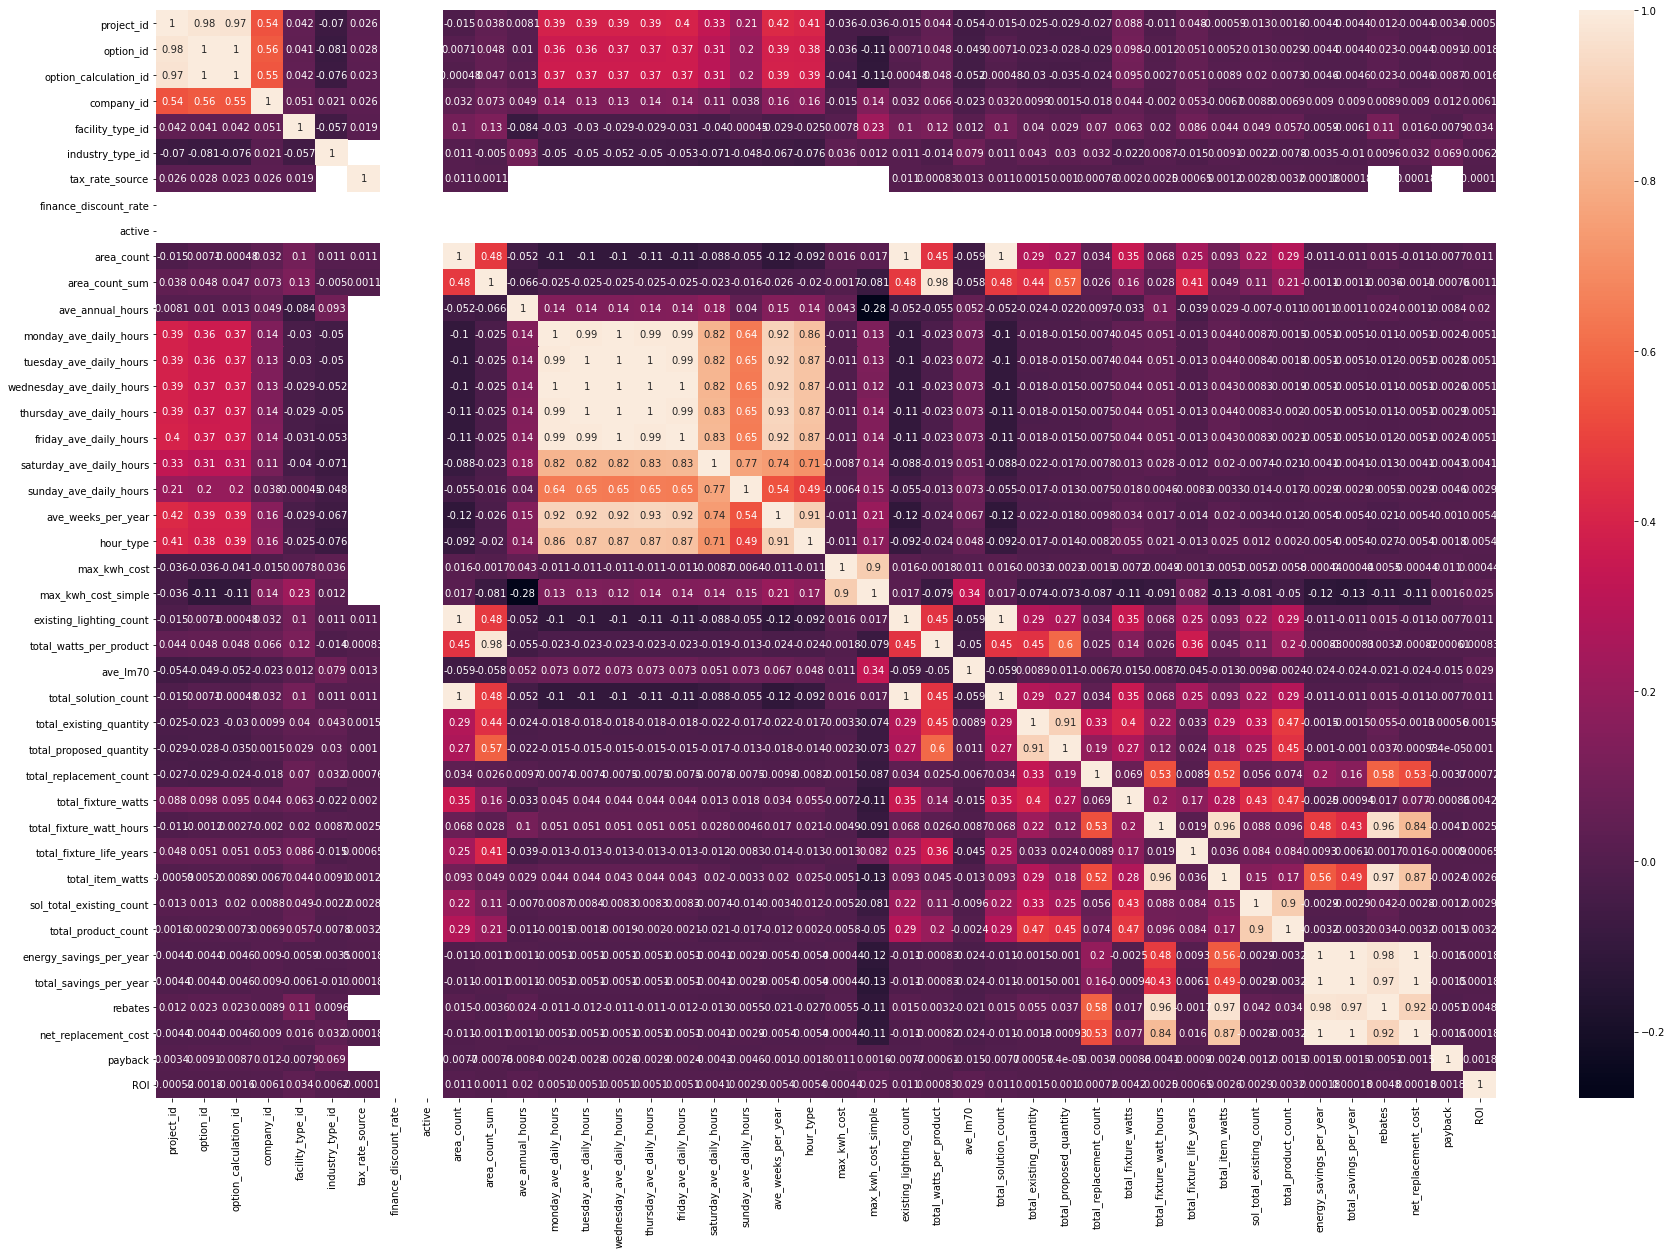

In [84]:
plt.figure(figsize=(30,20))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(Final_test1.corr(), annot=True)

In [63]:
Final_test.to_csv('Final_complete.csv')

In [43]:
Final.columns

Index(['project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type',
       'industry_type_id', 'name', 'started_at', 'finished_at',
       'tax_rate_source', 'finance_discount_rate', 'tax_exempt', 'active',
       'area_count', 'area_count_sum', 'ave_annual_hours',
       'monday_ave_daily_hours', 'tuesday_ave_daily_hours',
       'wednesday_ave_daily_hours', 'thursday_ave_daily_hours',
       'friday_ave_daily_hours', 'saturday_ave_daily_hours',
       'sunday_ave_daily_hours', 'ave_weeks_per_year', 'hour_type',
       'max_kwh_cost', 'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'energ

In [44]:
Final= Final[[
        
        #ids
       'project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type','industry_type_id','name',
        
        #dates
        'started_at', 'finished_at',
        
        #features
       'tax_rate_source','finance_discount_rate', 'tax_exempt', 'active', 'area_count',
       'area_count_sum', 'ave_annual_hours', 'monday_ave_daily_hours',
       'tuesday_ave_daily_hours', 'wednesday_ave_daily_hours',
       'thursday_ave_daily_hours', 'friday_ave_daily_hours',
       'saturday_ave_daily_hours', 'sunday_ave_daily_hours',
       'ave_weeks_per_year', 'hour_type', 'max_kwh_cost',
       'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
        
       'energy_savings_per_year',
       
        #savings
       'total_savings_per_year', 'rebates',
    
        #expenditures
       'net_replacement_cost','payback',

        #ROI
        'ROI']]

In [45]:
Final[Final.duplicated()]

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,...,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI


In [46]:
Final.to_csv('Final.csv')

In [144]:
Final.shape

(6199, 48)

In [142]:
Final_1_1=Final[Final['active']==True]

In [143]:
Final_1_1.shape

(5685, 48)

In [ ]:
Final[Final_1_1['ROI'].isna]

In [48]:
Final.head()

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,...,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,...,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,2.1300,NaN,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,...,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,119.0000,0.34,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,...,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,13330.0000,NaN,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,...,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,0.0000,NaN,inf
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,...,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,8489.2094,NaN,12.304965


In [187]:
Final_2.shape

(5425, 48)

In [188]:
Final_2.head()

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,2.1300,NaN,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,119.0000,0.34,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,13330.0000,NaN,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,0.0000,NaN,inf
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,8489.2094,NaN,12.304965


In [170]:
com1=Final_2[Final_2['company_id']==32]

In [172]:
com1.shape

(25, 48)

In [185]:
com1[com1.ROI > 20].project_id.nunique()

13

In [195]:
count=0
for i in Final_2['ROI']:
    if i>20:
        count+=1
print(count)    

3820


In [186]:
Final_2.to_csv('Final_complete.csv')

Further scope:
   aggregation of daily hours to annual hours
   merging with geodata

Further EDA:
    checking outliers
    plots for the columns